# Short-Term Synaptic Plasticity

*Written by Tyler Banks for the Neural Engineering Lab at the University of Missouri*

## Intro
Short-term synaptic plasticity (or short-term plasticity [STP]) is a phenomenon in which synaptic efficacy changes over time in response to previous presynaptic occurances.

Two types of STP have been observed:

* **Short-Term Depression** (STD)
* **Short-Term Facilitation** (STF)

Short-Term Depression is caused by depletion of neurotransmitters at the axon terminal while Short-Term Facilitation is caused by calcium influx into the axon terminal after a spike. This increases the release probablility of neurotransmitters.

STP typically occurs on the order of hundereds to thousands of milliseconds and is temporary. Without activity the synapse will quickly return to basline levels.

STP may serve as a substrate for processing temporal information. The response of a post-synaptic neuron depends on the history of the presynaptic activity. This information could theoretically be extracted for use. STP can enrich computational studies, allowing networks to produce capabilities difficult to be seen using static connections.

## Simulating STP

We'll begin our simulations with a single Hodgkin-Huxley neuron connected via standard Exp2Syn synapse. There are no short-term plasticity elements involved yet. The neuron is subjected to 20 Hz of uniform input for 500 ms.


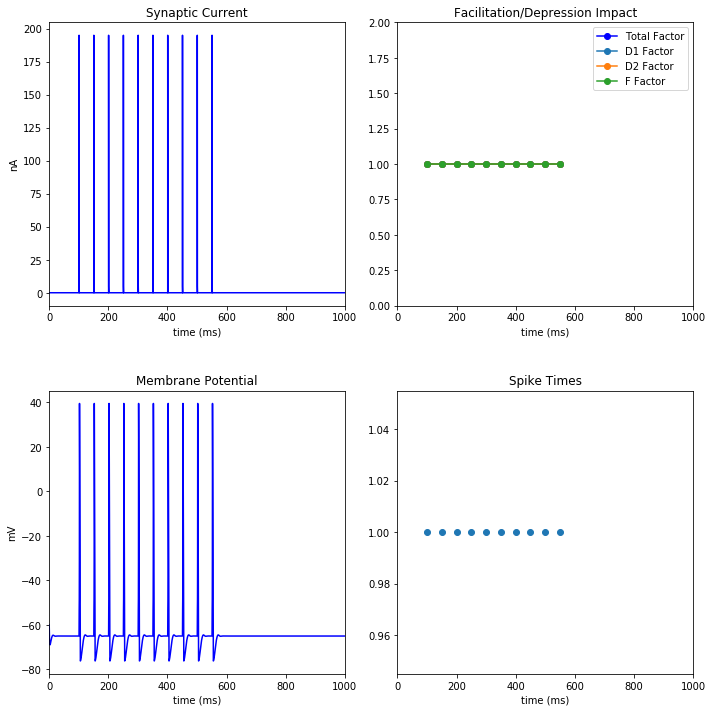

In [7]:
%matplotlib inline
import sim
sim.plot_hh_stsp(syn_d1=1,syn_d2=1,syn_f=1)

### STP Factor

For the most part we can leave our current Exp2Syn synapse alone. We'll need to compute an impact factor (facfactor) that will be multiplied by current (i) output equation:

```
i = g_syn*(voltage - synapse_reversal)*facfactor
```

Intuitively we realize that both depression and facilitation are dependent on the previous spike time as well as the current state of the system. The above facfactor will need to be a value between 0 and infinity, where anything less than 1 will result in depression and anything above will cause synaptic facilitation. Our solution is based on [Varela et al. (1997)](http://dx.doi.org/10.1523/JNEUROSCI.17-20-07926.1997) and takes the form:

\begin{align}
F_1 & = 1 + (F_1 - 1) * e^{(t_0)/\tau_F} \\
D_1 & = 1 - (1 - D_1) * e^{(t_0)/\tau_D} \\
f & = F_1 * D_1
\end{align}

Where ```t0``` is the time since the last spike

We can then re-write this as pseudocode for our implementation:

```
Facilitation  = 1 + (Facilitation-1)* exp(-(current_time - last_synapse_time)/tauFacilitation)
Depression = 1 - (1-Depression)*exp(-(current_time - last_synapse_time)/tauDepression)

facfactor = Facilitation * Depression
```

Initially, Facilitation and Depression are set to 1 and 0 respectively, resulting in no effect on synaptic conductance.

After the facfactor has been computed we can complete the system by multiplying each Facilitation and Depression variable by an impact factor ```f``` and ```d```. These will determine the strength/effect on the next synapse.

```
Facilitation = Facilitation * f
Depression = Depression * d
```

Facilitation or Depression can then be bound to an upper value through the following statement

```
if(Facilitation  > 30){
    F = 30
  }
```

Our completed model can be seen below. Here, there are two depression factors (D1 and D2), one is a slow depression and the other is fast acting but more powerful.


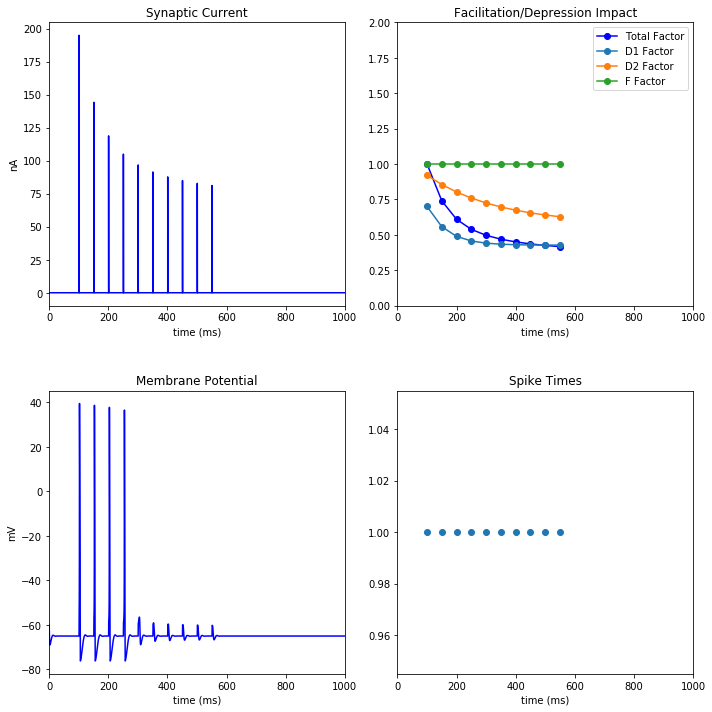

In [8]:
%matplotlib inline
import sim
sim.plot_hh_stsp()

## Interactive Example

To experiment with the effects of STP, run the following code and modify the widget sliders below. See how changing the depression and facilitation factors and their associated tau impact the cell's membrane potential.


In [9]:
%matplotlib inline
import sim
from ipywidgets import interactive

interactive(sim.plot_hh_stsp, 
                 syn_tauD1=(1,1000,10), syn_d1=(0,1,.05), 
                 syn_tauD2=(1,1000,10), syn_d2=(0,1,.05), 
                 syn_tauF=(1,1000),syn_f=(1,2,.05),
                 stim1_start= (0,1000,50), stim1_frequency=(1,50,1), stim1_duration=(0,1000,50))

interactive(children=(IntSlider(value=130, description='syn_tauD1', max=1000, min=1, step=10), FloatSlider(val…

## BMTK Model

This implementation has also been modeled using BMTK, see the ```bmtk_model``` folder for more.